# Instagram API Access
Visit https://www.instagram.com/developer/ and register an application. Next, register a client. After your client has been set up, click on 'Manage' and from the client management page, copy the client ID and client secret, pasting them below.

Next, visit the 'Security' tab and find the redirect URI that was set for your client. If none has been set, set one now. It can be 'http://www.google.com' if you like. Save the redirect URI to the variable below.

Much like Facebook's authentication system, Instagram uses a browser-based authentication system, so the following will be a 2-step process. We need to generate an access token, so we'll construct the URL to visit in a new browser tab so that we can complete the authentication process.

In [3]:
CLIENT_ID = ''
CLIENT_SECRET = ''

REDIRECT_URI = 'https://www.instagram.com'

base_url = 'https://api.instagram.com/oauth/authorize/'

url = '{0}?client_id={1}&redirect_uri={2}&response_type=code&scope=public_content'.format(base_url, CLIENT_ID, REDIRECT_URI)

print('Click the following URL, which will taken you to the REDIRECT_URI you set in creating the APP.')
print('You may need to log into Instagram.')
print()
print(url)

Click the following URL, which will taken you to the REDIRECT_URI you set in creating the APP.
You may need to log into Instagram.

https://api.instagram.com/oauth/authorize/?client_id=52ea3538c3714a3ea5cb1152334400fb&redirect_uri=https://www.instagram.com&response_type=code&scope=public_content


After authorization, copy the string following '`?code=...`' in the browser's address bar.

In [4]:
import requests # pip install requests

CODE = ''

payload = dict(client_id=CLIENT_ID, 
               client_secret=CLIENT_SECRET,
               grant_type='authorization_code',
               redirect_uri=REDIRECT_URI,
               code=CODE)

response = requests.post(
    'https://api.instagram.com/oauth/access_token',
    data = payload)

ACCESS_TOKEN = response.json()['access_token']

In [5]:
response = requests.get('https://api.instagram.com/v1/users/self/?access_token='+ACCESS_TOKEN)

print(response.text)

{"data": {"id": "212661823", "username": "ecmyhre", "profile_picture": "https://scontent.cdninstagram.com/vp/cf7b71616f4674af678e2a18b3d9e097/5D7D3389/t51.2885-19/s150x150/49791079_756619378047894_8616104119792304128_n.jpg?_nc_ht=scontent.cdninstagram.com", "full_name": "Eric", "bio": "Just a guy, standing in front of the internet, telling it that he loves it. \ud83c\udff3\ufe0f\u200d\ud83c\udf08", "website": "http://ecmyhre.com/", "is_business": false, "counts": {"media": 39, "follows": 1110, "followed_by": 1754}}, "meta": {"code": 200}}


In [6]:
# Retrieve your feed
from IPython.display import display, Image 

response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

def display_image_feed(feed, include_captions=True):
    for post in feed['data']:
        display(Image(url=post['images']['low_resolution']['url']))
        print(post['images']['standard_resolution']['url'])
        if include_captions: print(post['caption']['text'])
        print()


display_image_feed(recent_posts, include_captions=True)

https://scontent.cdninstagram.com/vp/51723ac1dfa50d7123da81f75165f1c9/5D91B06F/t51.2885-15/sh0.08/e35/s640x640/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com
Be gay, do crimes.



https://scontent.cdninstagram.com/vp/d40db4eb07d08fac21a2333d3acddbac/5D92F337/t51.2885-15/sh0.08/e35/s640x640/36148034_1710831005704990_7152891268366860288_n.jpg?_nc_ht=scontent.cdninstagram.com
Yerrr!!! ☀️



https://scontent.cdninstagram.com/vp/03ff87250a52073f5fa6160330c15f9f/5D95A426/t51.2885-15/sh0.08/e35/s640x640/33239802_1975357622793512_4205640368609296384_n.jpg?_nc_ht=scontent.cdninstagram.com
Issa hazelnut #woof



https://scontent.cdninstagram.com/vp/5d65842b13e76b92224b30d238dc592c/5D96C9FA/t51.2885-15/sh0.08/e35/s640x640/29415533_430936460698800_5339266620969713664_n.jpg?_nc_ht=scontent.cdninstagram.com
2AM under the bridge



https://scontent.cdninstagram.com/vp/cd1abb5eb332bde8a45ac9e5d8941d5b/5D61A41D/t51.2885-15/sh0.08/e35/p640x640/29094823_468347370249290_5963967896185995264_n.jpg?_nc_ht=scontent.cdninstagram.com


TypeError: 'NoneType' object is not subscriptable

In [9]:
import json

response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

print(json.dumps(recent_posts, indent=1))

{
 "pagination": {},
 "data": [
  {
   "id": "1940934739557126877_212661823",
   "user": {
    "id": "212661823",
    "full_name": "Eric",
    "profile_picture": "https://scontent.cdninstagram.com/vp/cf7b71616f4674af678e2a18b3d9e097/5D7D3389/t51.2885-19/s150x150/49791079_756619378047894_8616104119792304128_n.jpg?_nc_ht=scontent.cdninstagram.com",
    "username": "ecmyhre"
   },
   "images": {
    "thumbnail": {
     "width": 150,
     "height": 150,
     "url": "https://scontent.cdninstagram.com/vp/94d8d909835022b17858fa0f897e16f9/5D62ACC8/t51.2885-15/e35/s150x150/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com"
    },
    "low_resolution": {
     "width": 320,
     "height": 320,
     "url": "https://scontent.cdninstagram.com/vp/478e8aac67389f8e476e88526afb1ef6/5D79EC38/t51.2885-15/e35/s320x320/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com"
    },
    "standard_resolution": {
     "width": 640,
     "height": 64

In [10]:
print(recent_posts.keys())

dict_keys(['pagination', 'data', 'meta'])


In [11]:
print(recent_posts['pagination'])
print(recent_posts['meta'])

{}
{'code': 200}


In [12]:
print(json.dumps(recent_posts['data'], indent=1))

[
 {
  "id": "1940934739557126877_212661823",
  "user": {
   "id": "212661823",
   "full_name": "Eric",
   "profile_picture": "https://scontent.cdninstagram.com/vp/cf7b71616f4674af678e2a18b3d9e097/5D7D3389/t51.2885-19/s150x150/49791079_756619378047894_8616104119792304128_n.jpg?_nc_ht=scontent.cdninstagram.com",
   "username": "ecmyhre"
  },
  "images": {
   "thumbnail": {
    "width": 150,
    "height": 150,
    "url": "https://scontent.cdninstagram.com/vp/94d8d909835022b17858fa0f897e16f9/5D62ACC8/t51.2885-15/e35/s150x150/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com"
   },
   "low_resolution": {
    "width": 320,
    "height": 320,
    "url": "https://scontent.cdninstagram.com/vp/478e8aac67389f8e476e88526afb1ef6/5D79EC38/t51.2885-15/e35/s320x320/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com"
   },
   "standard_resolution": {
    "width": 640,
    "height": 640,
    "url": "https://scontent.cdninstagram.com/vp/

In [13]:
print(json.dumps(recent_posts['data'][0], indent=1))

{
 "id": "1940934739557126877_212661823",
 "user": {
  "id": "212661823",
  "full_name": "Eric",
  "profile_picture": "https://scontent.cdninstagram.com/vp/cf7b71616f4674af678e2a18b3d9e097/5D7D3389/t51.2885-19/s150x150/49791079_756619378047894_8616104119792304128_n.jpg?_nc_ht=scontent.cdninstagram.com",
  "username": "ecmyhre"
 },
 "images": {
  "thumbnail": {
   "width": 150,
   "height": 150,
   "url": "https://scontent.cdninstagram.com/vp/94d8d909835022b17858fa0f897e16f9/5D62ACC8/t51.2885-15/e35/s150x150/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com"
  },
  "low_resolution": {
   "width": 320,
   "height": 320,
   "url": "https://scontent.cdninstagram.com/vp/478e8aac67389f8e476e88526afb1ef6/5D79EC38/t51.2885-15/e35/s320x320/46965490_230358987873689_3246312774713462137_n.jpg?_nc_ht=scontent.cdninstagram.com"
  },
  "standard_resolution": {
   "width": 640,
   "height": 640,
   "url": "https://scontent.cdninstagram.com/vp/51723ac1dfa50d7123da81f75

In [15]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

# Rescale the data and split into training and test sets
X, y = digits.data / 255., digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print()
print("Training set score: {0}".format(mlp.score(X_train, y_train)))
print("Test set score: {0}".format(mlp.score(X_test, y_test)))

Iteration 1, loss = 2.08212650
Iteration 2, loss = 1.03684958
Iteration 3, loss = 0.46502758
Iteration 4, loss = 0.29285682
Iteration 5, loss = 0.22862621
Iteration 6, loss = 0.18877491
Iteration 7, loss = 0.15163667
Iteration 8, loss = 0.13317189
Iteration 9, loss = 0.11696284
Iteration 10, loss = 0.09268670
Iteration 11, loss = 0.08840361
Iteration 12, loss = 0.08064708
Iteration 13, loss = 0.06800582
Iteration 14, loss = 0.06649765
Iteration 15, loss = 0.05651331
Iteration 16, loss = 0.05649585
Iteration 17, loss = 0.06339016
Iteration 18, loss = 0.06884457
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)


Training set score: 0.9806978470675576
Test set score: 0.9577777777777777


[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

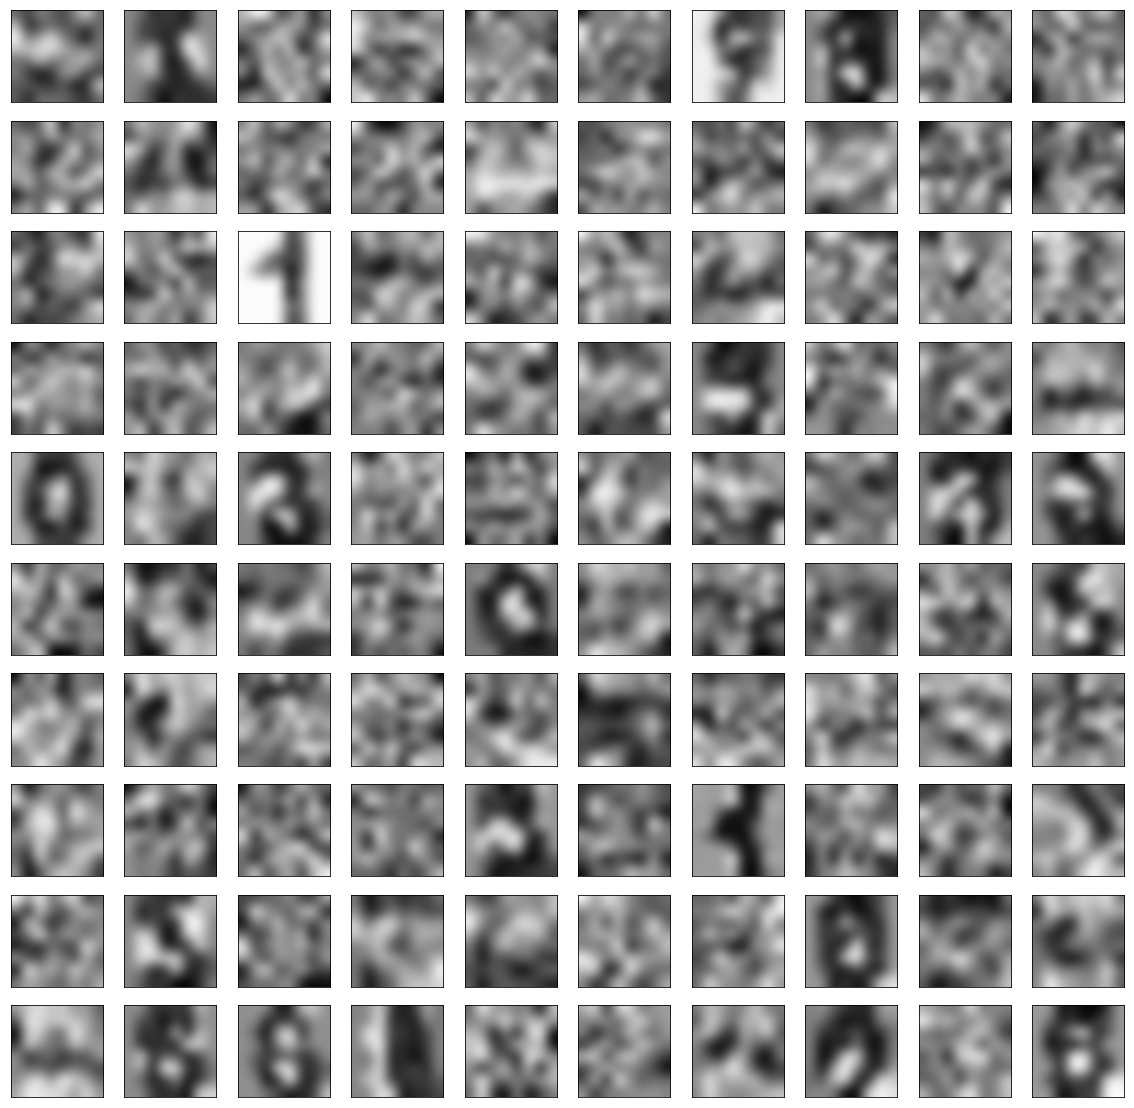

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10,10)
fig.set_figwidth(20)
fig.set_figheight(20)

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, interpolation='bicubic')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

(-0.5, 7.5, 7.5, -0.5)

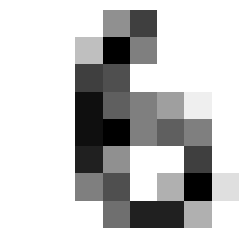

Ground Truth: 6
Predicted: 6


(-0.5, 7.5, 7.5, -0.5)

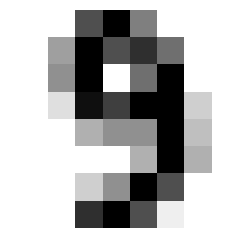

Ground Truth: 9
Predicted: 9


(-0.5, 7.5, 7.5, -0.5)

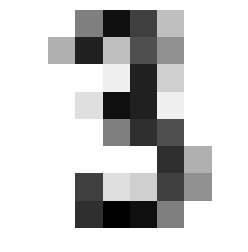

Ground Truth: 3
Predicted: 3


(-0.5, 7.5, 7.5, -0.5)

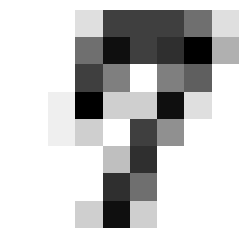

Ground Truth: 7
Predicted: 7


(-0.5, 7.5, 7.5, -0.5)

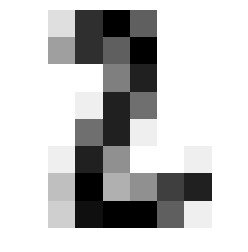

Ground Truth: 2
Predicted: 2


In [17]:
import numpy as np 
predicted = mlp.predict(X_test)

for i in range(5):
    image = np.reshape(X_test[i], (8,8))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.show()
    print('Ground Truth: {0}'.format(y_test[i]))
    print('Predicted: {0}'.format(predicted[i]))